In [ ]:
# Price prediction purchase & accuracy of used cars - Capstone Project - Final Report #

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve

from sklearn.metrics import auc as skl_auc


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [11]:
Data Overview:
7936 rows
59 columns in total but considering the below columns for the analysis:s
1. Manufacturer: Brand name of the car\vehicle - String datatype
2. Year: year of manufacture
3. Mileage: Number of miles travelled
4. Car Reviews Count: Number of review comments to find opinion over the car which is availalbe in market

In [3]:
#Data Preparation - Cleaning by casting the data types, filtered the targetted data
vehicle_df = pd.read_csv('cleaned_used_cars_prices_datafile.csv')

vehicle_df['Year'] = vehicle_df['Year'].astype(int)
vehicle_df['Seller Reviews Count'] = vehicle_df['Seller Reviews Count'].astype(int)
vehicle_df['Car Reviews Count'] = vehicle_df['Car Reviews Count'].astype(int)
vehicle_df['Mileage'] = vehicle_df['Mileage'].astype(int)
vehicle_df.to_csv('cleaned_used_cars_prices.csv', index=False)
condition = vehicle_df['Year'] < 1995
df_filtered = vehicle_df[~condition]

Numofrows1 = len(df_filtered.index)
print(Numofrows1)

#Targetted data for the 'Lexus' brand cars
df_filtered_brand = vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
print(len(df_filtered_brand.index))

7823
293


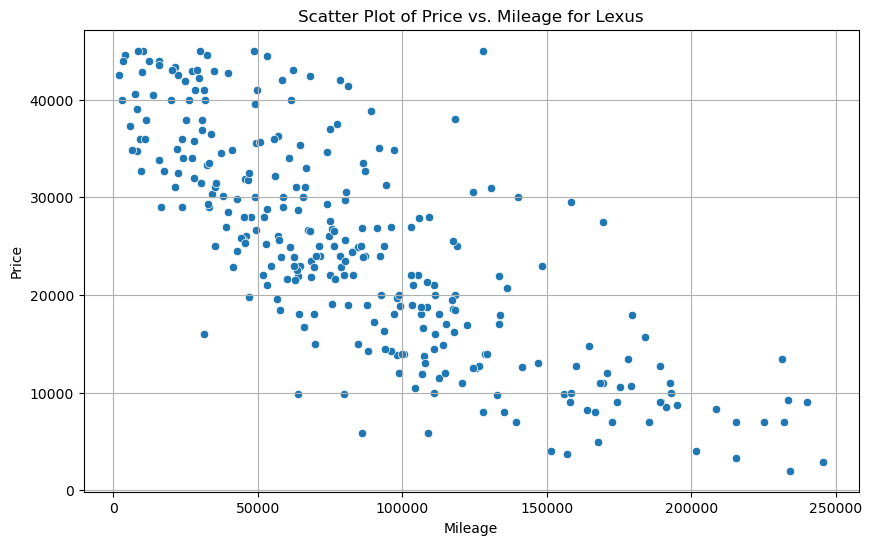

<Figure size 640x480 with 0 Axes>

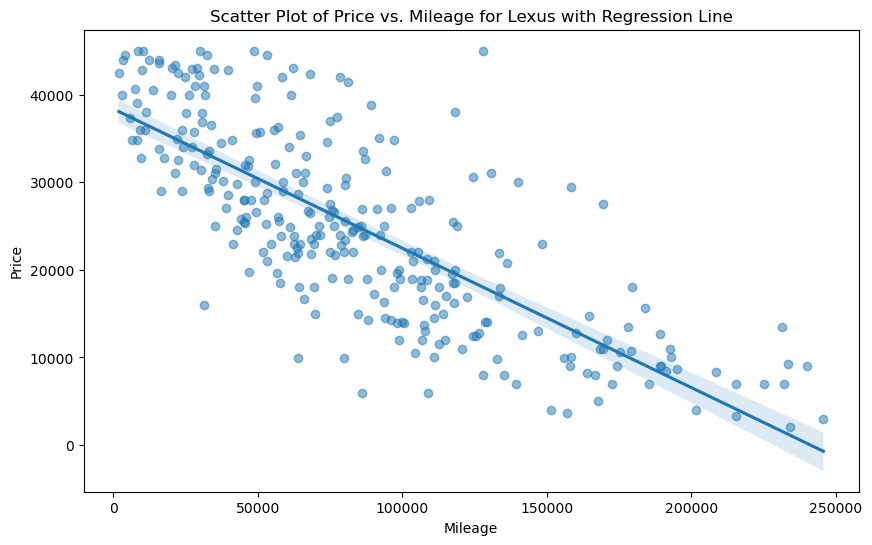

<Figure size 640x480 with 0 Axes>

In [5]:
#Price drops as mileage increases - Scatter Plot of Price vs. Mileage for Lexus with Regression Line

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"].set_index(['Year','Manufacturer'])
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mileage', y='Price (USD)', data=vehicle_df_1)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Mileage for Lexus')
plt.grid()
plt.show()
plt.savefig("img/UsedCars_Scatter_Plot_img_01.png")

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"].set_index(['Year','Manufacturer'])
plt.figure(figsize=(10,6))
sns.regplot(x='Mileage', y='Price (USD)', data=vehicle_df_1, scatter_kws={'alpha':0.5})
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Mileage for Lexus with Regression Line')
plt.show()
plt.savefig("img/UsedCars_Scatter_Plot_With_Regression_img_02.png")


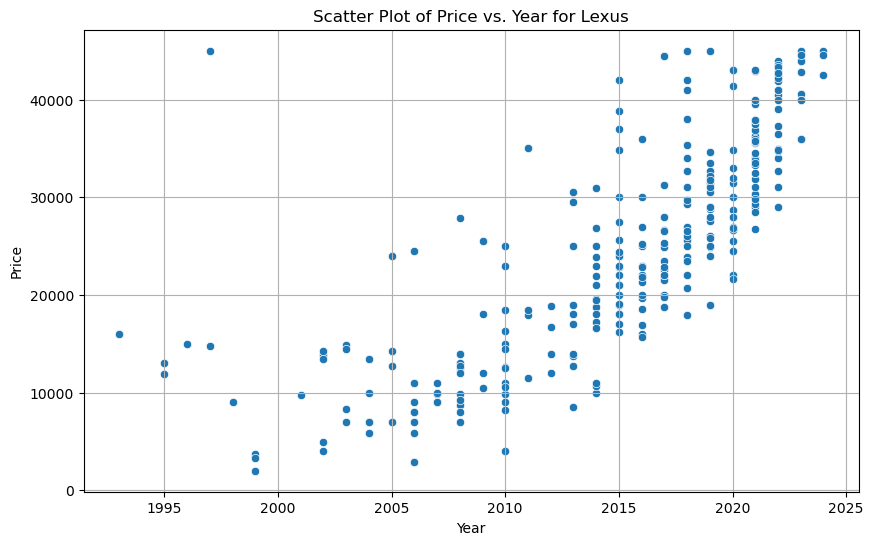

<Figure size 640x480 with 0 Axes>

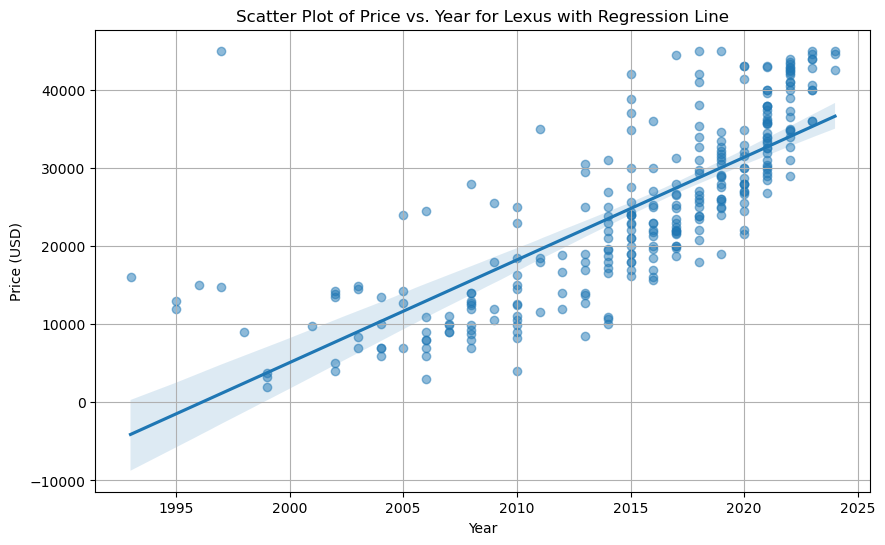

<Figure size 640x480 with 0 Axes>

In [7]:
#Newer cars have higher prices - Scatter Plot of Price vs. Year for Lexus with Regression Line
vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"].set_index(['Year','Manufacturer'])

plt.figure(figsize=(10,6))
sns.scatterplot(x='Year', y='Price (USD)', data=vehicle_df_1)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Year for Lexus')
plt.grid()
plt.show()
plt.savefig("img/UsedCars_Scatter_Plot_img_03.png")

vehicle_df_2=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"].set_index(['Manufacturer'])
plt.figure(figsize=(10,6))
sns.regplot(x='Year', y='Price (USD)', data=vehicle_df_2, scatter_kws={'alpha':0.5})
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of Price vs. Year for Lexus with Regression Line')
plt.grid()
plt.show()
plt.savefig("img/UsedCars_Scatter_Plot_With_Regression_img_04.png")


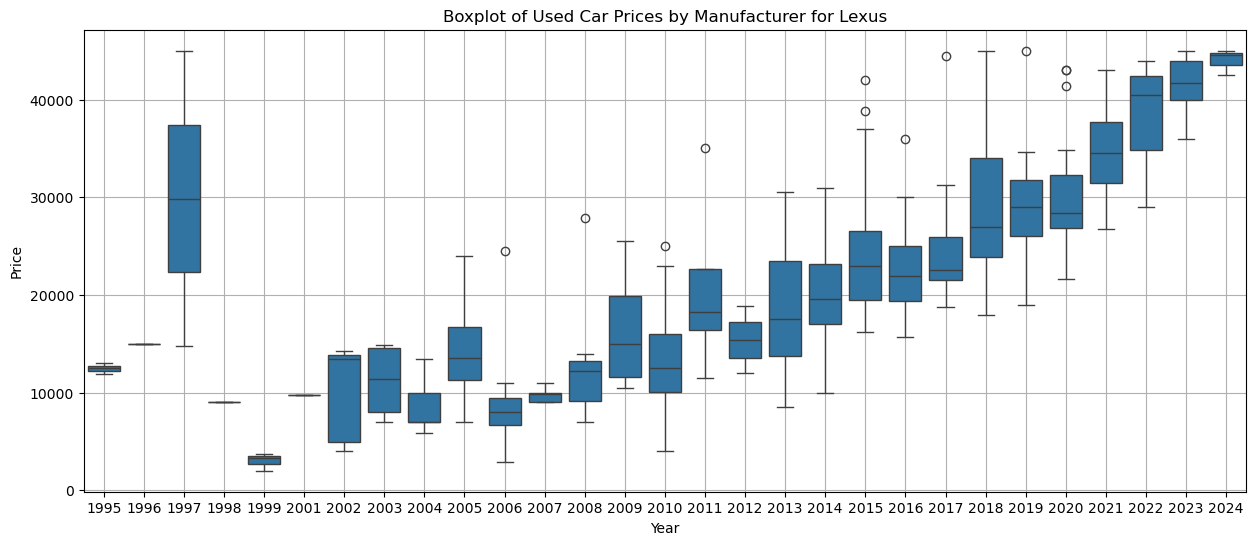

<Figure size 640x480 with 0 Axes>

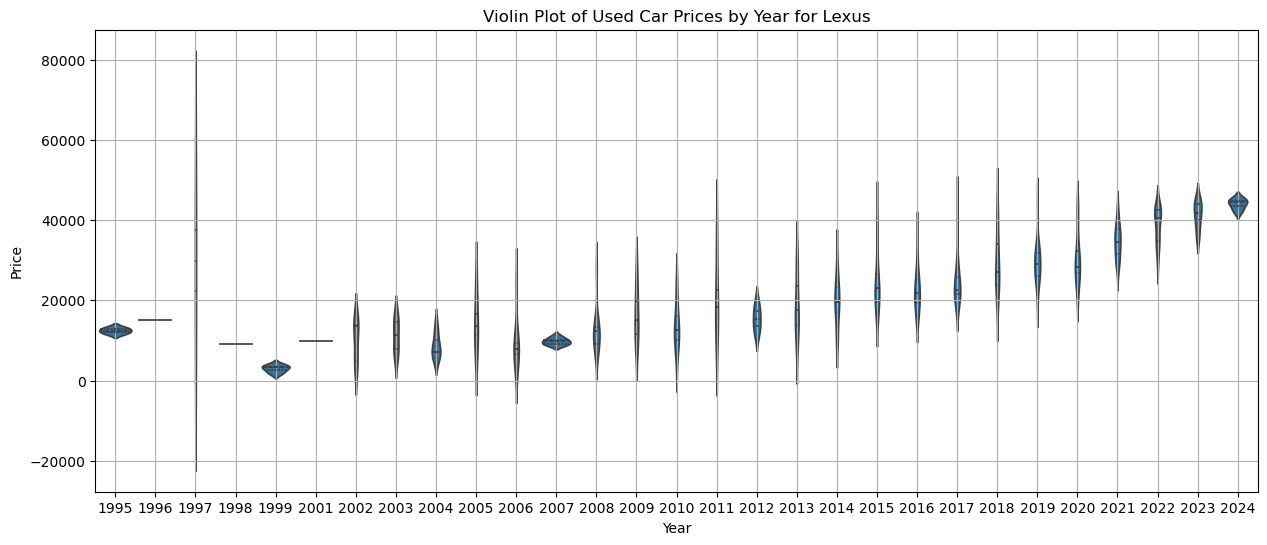

<Figure size 640x480 with 0 Axes>

In [9]:

vehicle_df_2=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_1=vehicle_df_2[vehicle_df_2['Year'] >= 1995].set_index(['Year','Manufacturer'])

# Shows the median, quartiles, and outliers for each group (e.g., manufacturer).
# Useful for quickly comparing price ranges and spotting outliers

plt.figure(figsize=(15,6))
sns.boxplot(x='Year', y='Price (USD)', data=vehicle_df_1)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Boxplot of Used Car Prices by Manufacturer for Lexus')
plt.grid()
plt.show()
plt.savefig("img/UsedCars_Box_Plot_img_05.png")

# Combines a boxplot with a density estimate, revealing the full distribution shape for each group (e.g., year). 
# Useful for identifying multimodal distributions or skewness

plt.figure(figsize=(15,6))
sns.violinplot(x='Year', y='Price (USD)', data=vehicle_df_1, inner='quartile')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Violin Plot of Used Car Prices by Year for Lexus')
plt.grid()
plt.show()
plt.savefig("img/UsedCars_Violin_Plot_img_06.png")

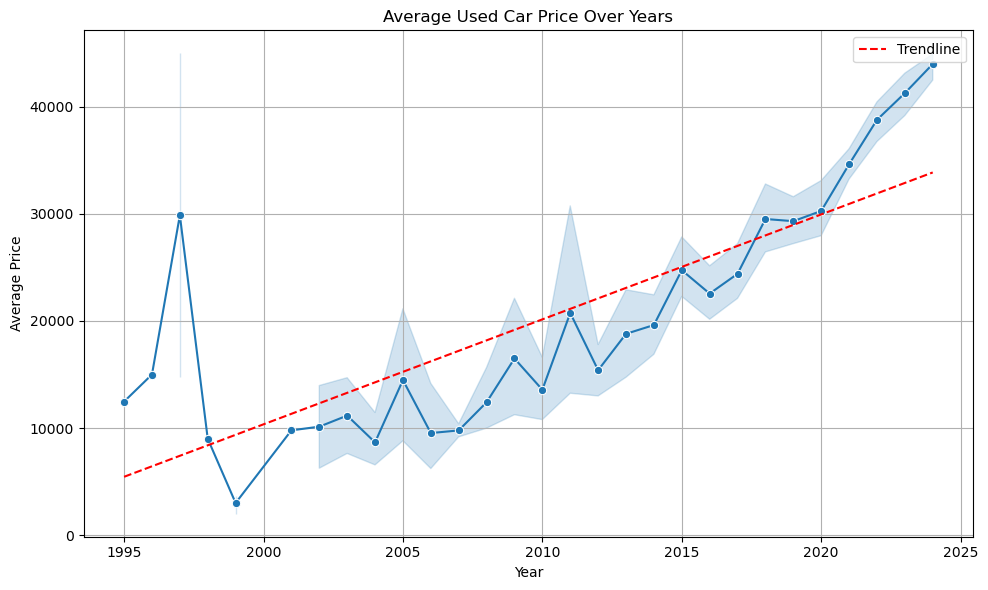

<Figure size 640x480 with 0 Axes>

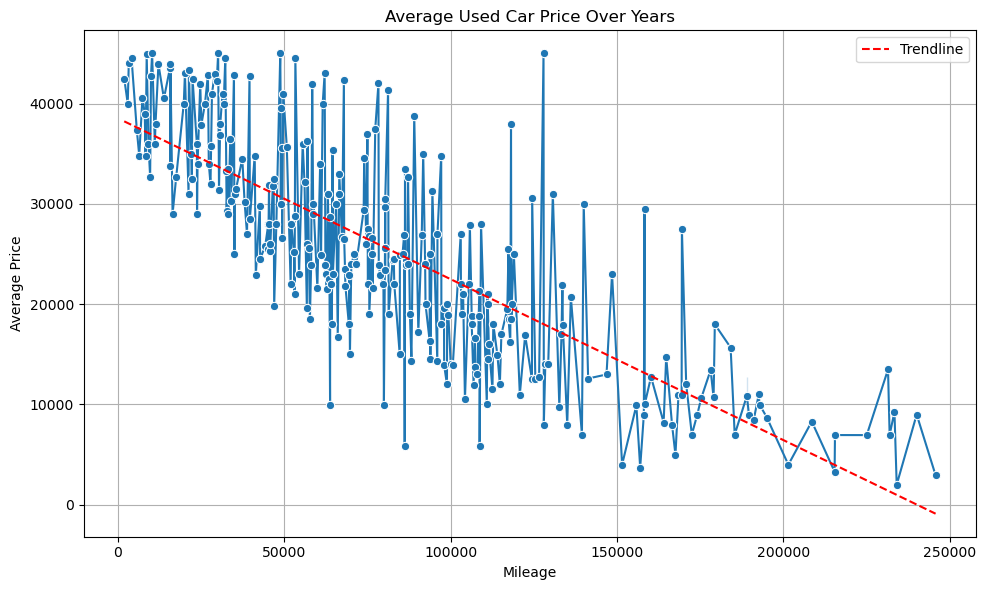

<Figure size 640x480 with 0 Axes>

In [13]:
# vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:3].tolist())].set_index(['Year','Manufacturer'])

vehicle_df_2=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_1=vehicle_df_2[vehicle_df_2['Year'] >= 1995].set_index(['Year','Manufacturer'])

avg_price_by_year = vehicle_df_1.groupby('Year')['Price (USD)'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Price (USD)', data=vehicle_df_1, marker='o')
plt.title('Average Used Car Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)

# Add a linear trendline
slope, intercept, r_value, p_value, std_err = linregress(avg_price_by_year['Year'], avg_price_by_year['Price (USD)'])
plt.plot(avg_price_by_year['Year'],
         intercept + slope*avg_price_by_year['Year'],
         color='red', linestyle='--', label='Trendline')

plt.legend()
plt.tight_layout()
plt.show()
# Depreciation, market cycles
plt.savefig("img/UsedCars_Lineplot_With_Regression_img07.png")

avg_price_by_mileage = vehicle_df_1.groupby('Mileage')['Price (USD)'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Mileage', y='Price (USD)', data=vehicle_df_1, marker='o')
plt.title('Average Used Car Price Over Years')
plt.xlabel('Mileage')
plt.ylabel('Average Price')
plt.grid(True)

# Add a linear trendline
slope, intercept, r_value, p_value, std_err = linregress(avg_price_by_mileage['Mileage'], avg_price_by_mileage['Price (USD)'])
plt.plot(avg_price_by_mileage['Mileage'],
         intercept + slope*avg_price_by_mileage['Mileage'],
         color='red', linestyle='--', label='Trendline')

plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("img/UsedCars_Lineplot_With_Regression_img08.png")

# Usage patterns, consumer behavior
# plt.savefig("img/UsedCars_Lineplot_img.png")

In [ ]:
Linear Regression:


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_2=vehicle_df_1[vehicle_df_1['Year'] >= 1995].set_index(['Year','Manufacturer'])

# Features and target
X = vehicle_df_2.drop('Price (USD)', axis=1)
y = vehicle_df_2['Price (USD)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
reg = LinearRegression()
reg.fit(X_train, y_train)

# Prediction and evaluation
y_pred = reg.predict(X_test)
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

R^2 Score: 0.80


In [17]:
vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_2=vehicle_df_1[vehicle_df_1['Year'] >= 1995].set_index(['Year','Manufacturer'])
# Classification into Price Bands - By converting continuous price data into discrete categories (e.g., "low", "medium", "high"), 
# logistic regression can classify cars into these bands based on their features.
# Create price bins
bins = np.linspace(vehicle_df_2['Price (USD)'].min(), vehicle_df_2['Price (USD)'].max(), 4)
labels = ['Low', 'Medium', 'High']
vehicle_df_2['price_band'] = pd.cut(vehicle_df_2['Price (USD)'], bins=bins, labels=labels, include_lowest=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode target variable
le = LabelEncoder()
vehicle_df_2['price_band_encoded'] = le.fit_transform(vehicle_df_2['price_band'])

# Features and target for classification
X_cls = vehicle_df_2.drop(['Price (USD)', 'price_band', 'price_band_encoded'], axis=1)
y_cls = vehicle_df_2['price_band_encoded']

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(Xc_train, yc_train)

# Prediction and evaluation
yc_pred = clf.predict(Xc_test)
print(classification_report(yc_test, yc_pred, target_names=labels))


              precision    recall  f1-score   support

         Low       0.94      0.83      0.88        18
      Medium       0.93      0.81      0.87        16
        High       0.83      0.96      0.89        25

    accuracy                           0.88        59
   macro avg       0.90      0.87      0.88        59
weighted avg       0.89      0.88      0.88        59



In [ ]:
Logistic Regression:
Output Interpreatation:
1. Accuracy for the prediction of used Lexus brand is 83%
2. Confusion Matrix - prediction of true positives & true negatives is way higher than False positives & false negatives
3. Classification Report - Classification into Price Bands - By converting continuous price data into discrete categories (e.g., "low", "medium", "high"), logistic regression can classify cars into these bands based on their features.

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load your dataset
# vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:5].tolist())].set_index(['Year','Manufacturer'])
# vehicle_df_2=vehicle_df_1

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_2=vehicle_df_1[vehicle_df_1['Year'] >= 1995].set_index(['Year','Manufacturer'])

# brands = ["Lexus", "Toyota"]
# year_condition=[vehicle_df['Year'] == 1995, vehicle_df['Year'] > 1995]
# vehicle_df_2 = np.select(year_condition, brands)
# vehicle_df_2
# print(len(vehicle_df_2.index))

# 2. Create a binary target: 1 if price above median, 0 otherwise
median_price = vehicle_df_2['Price (USD)'].median()
vehicle_df_2['above_median'] = (vehicle_df_2['Price (USD)'] > median_price).astype(int)

# 3. Select features (adjust as needed)
features = ['MPG MAX', 'MPG MIN', 'Mileage', 'Engine Volume (L)', 'Seller Reviews Count', 'Car Reviews Count', 'Car Recommendation Rate']
X = vehicle_df_2[features]
y = vehicle_df_2['above_median']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8305084745762712
Confusion Matrix:
 [[25  5]
 [ 5 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.83      0.83      0.83        29

    accuracy                           0.83        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.83      0.83      0.83        59



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


(5, 5, nan)

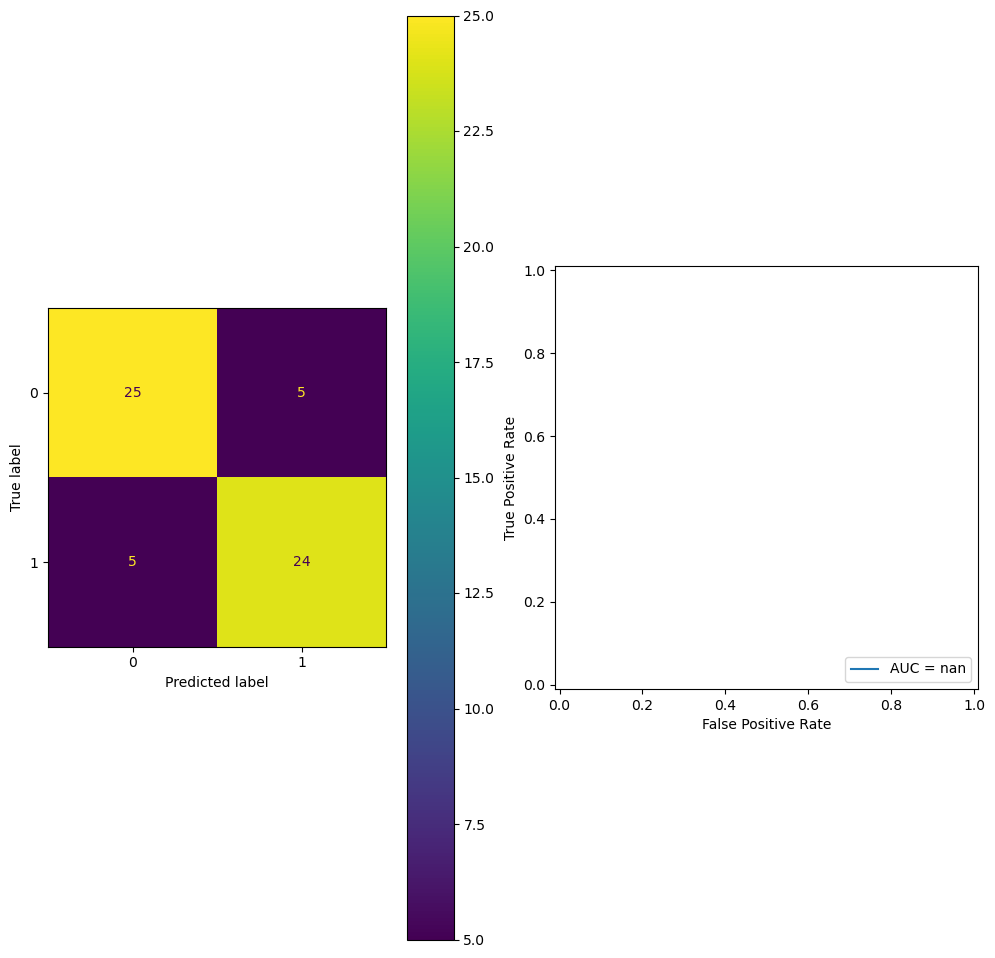

In [21]:
fp = ''
fn = ''
auc = ''

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

lgr_pipe=model

preds = lgr_pipe.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, preds)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = lgr_pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label='Yes')
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(roc_auc_value, 2)
# auc=0.86

fp, fn, auc

In [ ]:
Decision Trees:

In [23]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score,f1_score, classification_report

import time


# 1. Load your dataset
# vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:5].tolist())].set_index(['Year','Manufacturer'])
# vehicle_df_2=vehicle_df_1

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_2=vehicle_df_1[vehicle_df_1['Year'] >= 1995].set_index(['Year','Manufacturer'])

# X_train, X_test, y_train, y_test = train_test_split(default.drop('default', axis = 1), default.default, 
      
                                                    
# bins = np.linspace(vehicle_df_2['Price (USD)'].min(), vehicle_df_2['Price (USD)`'].max(), 4)random_state = 42)

# labels = ['Low', 'Medium', 'High']

# features = ['MPG MAX', 'MPG MIN', 'Mileage', 'Engine Volume (L)', 'Seller Reviews Count', 'Car Reviews Count', 'Car Recommendation Rate']
# X = vehicle_df_2[features]
# y = vehicle_df_2['Price (USD)']


# df['price_band'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

features = ['MPG MAX', 'MPG MIN', 'Mileage', 'Engine Volume (L)', 'Seller Reviews Count', 'Car Reviews Count', 'Car Recommendation Rate']
X = vehicle_df_2[features]
y = vehicle_df_2['Price (USD)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Create price bands (e.g., Low, Medium, High)
bins = np.linspace(vehicle_df_2['Price (USD)'].min(), vehicle_df_2['Price (USD)'].max(), 4)
labels = ['Low', 'Medium', 'High']
vehicle_df_2['Price (USD)'] = pd.cut(vehicle_df_2['Price (USD)'], bins=bins, labels=labels, include_lowest=True)

# Features and target for classification
X_cls = vehicle_df_2[features]
y_cls = vehicle_df_2['Price (USD)']

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.25, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(Xc_train, yc_train)

# Predict and evaluate
yc_pred = clf.predict(Xc_test)
print(classification_report(yc_test, yc_pred, target_names=labels))

# -------------------------------------------------
# tree = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('tree', DecisionTreeClassifier())
# ])

# tree_params = {'tree__criterion' : ['gini', 'entropoy'],
#               'tree__max_depth' : [1,2],
#               'tree__min_samples_split' : [1,2]}

# #gridsearch
# tree_grid = RandomizedSearchCV(estimator = tree,
#                    param_distributions = tree_params)

# start = time.time()
# tree_grid.fit(Xc_train, yc_train)
# stop = time.time()

# #stats
# tree_time = stop - start
# tree_params = tree_grid.best_params_
# tree_acc = tree_grid.score(X_test, y_test)
# tree_rec = recall_score(y_test, tree_grid.predict(X_test))
# tree_f1 = f1_score(y_test, tree_grid.predict(X_test))

# #best params
# tree_params

Mean Absolute Error: 3805.81
              precision    recall  f1-score   support

         Low       0.87      0.83      0.85        24
      Medium       0.79      0.65      0.71        17
        High       0.78      0.88      0.82        32

    accuracy                           0.81        73
   macro avg       0.81      0.79      0.79        73
weighted avg       0.81      0.81      0.81        73



In [36]:
nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('bayes', MultinomialNB())
])

In [38]:
nb_params = {'bayes__alpha' : [1, 0.1, 0.01, 0.001, 0]}

In [ ]:
Naïve Bayes:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_2=vehicle_df[vehicle_df['Year'] >= 1995].set_index(['Year'])

# vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:5].tolist())].set_index(['Year','Manufacturer'])
# vehicle_df_2=vehicle_df_1


# features = ['MPG MAX', 'MPG MIN', 'Mileage', 'Engine Volume (L)', 'Seller Reviews Count', 'Car Reviews Count', 'Car Recommendation Rate']
# features = ['Mileage']
X = vehicle_df_2['Manufacturer']
y = vehicle_df_2['Mileage'] #,'Car Recommendation Rate'
print(X.shape)
print(y.shape)

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create a pipeline: TF-IDF vectorizer + Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# 4. Define parameter grid for RandomizedSearchCV
param_dist = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__min_df': [1, 3, 5],
    'tfidf__max_features': [None, 500, 1000],
    'nb__alpha': [0.1, 0.5, 1.0, 2.0]
}

# 5. Set up RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,           # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 6. Fit the model

tart = time.time()
search.fit(X_train, y_train)
stop = time.time()

# 7. Evaluate on the test set
y_pred = search.predict(X_test)
print("Best Parameters:", search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#stats
nb_time = stop - start
nb_params = search.best_params_
nb_acc = search.score(X_test, y_test)
nb_rec = recall_score(y_test, search.predict(X_test),average='macro')
nb_f1 = f1_score(y_test, search.predict(X_test),average='macro')

print('nb_time'+nb_time)
print('nb_params'+nb_params)
print('nb_acc'+nb_acc)
print('nb_rec'+nb_rec)
print('nb_f1'+nb_f1)

In [ ]:
Logistic Regression

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import loguniform

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_2=vehicle_df[vehicle_df['Year'] >= 1995].set_index(['Year'])

X = vehicle_df_2['Manufacturer']
y = vehicle_df_2['Mileage'] #,'Car Recommendation Rate'
print(X.shape)
print(y.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(random_state=42))
])

# Define hyperparameter grid
param_dist = {
    'tfidf__ngram_range': [(1,1), (1,2)],          # Unigrams or bigrams
    'tfidf__max_df': [0.75, 1.0],                 # Ignore frequent terms
    'tfidf__min_df': [1, 3],                      # Ignore rare terms
    'tfidf__max_features': [None, 1000],          # Limit vocabulary size
    'logreg__C': loguniform(1e-4, 100),           # Regularization strength
    'logreg__penalty': ['l1', 'l2'],              # Regularization type
    'logreg__solver': ['liblinear', 'saga']       # Solvers compatible with L1/L2
}

# Configure RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,                # Number of parameter combinations to try
    scoring='accuracy',
    cv=2,                     # Use 3-5 folds if you have small classes
    verbose=1,
    random_state=42,
    n_jobs=-1
)

start = time.time()
search.fit(X_train, y_train)
stop = time.time()

# Evaluate best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nBest Parameters:", search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Sample prediction
sample_text = ["Low mileage 2020 sedan with premium features"]
print("\nSample Prediction:", best_model.predict(sample_text)[0])


# lgr_grid.fit(X_train, y_train)

#stats
lgr_time = stop - start
lgr_params = search.best_params_
lgr_acc = search.score(X_test, y_test)
lgr_rec = recall_score(y_test, search.predict(X_test), average='macro')
lgr_f1 = f1_score(y_test, search.predict(X_test), average='macro')

print('lgr_time'+lgr_time)
print('lgr_params'+lgr_params)
print('lgr_acc'+lgr_acc)
print('lgr_rec'+lgr_rec)
print('lgr_f1'+lgr_f1)


(7823,)
(7823,)
Fitting 2 folds for each of 50 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: Convergence


Best Parameters: {'logreg__C': 0.017670169402947963, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'tfidf__max_df': 0.75, 'tfidf__max_features': 1000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Test Accuracy: 0.0
              precision    recall  f1-score   support

         105       0.00      0.00      0.00       1.0
         152       0.00      0.00      0.00       1.0
         310       0.00      0.00      0.00       1.0
         633       0.00      0.00      0.00       1.0
         955       0.00      0.00      0.00       1.0
        1018       0.00      0.00      0.00       1.0
        1265       0.00      0.00      0.00       1.0
        1607       0.00      0.00      0.00       1.0
        1690       0.00      0.00      0.00       1.0
        1827       0.00      0.00      0.00       1.0
        1955       0.00      0.00      0.00       1.0
        1998       0.00      0.00      0.00       1.0
        2088       0.00      0.00      0.00       1.0
        2190

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

In [ ]:
DecisionTressClassifier

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_2=vehicle_df[vehicle_df['Year'] >= 1995].set_index(['Year'])

X = vehicle_df_2['Manufacturer']
y = vehicle_df_2['Mileage'] #,'Car Recommendation Rate'
print(X.shape)
print(y.shape)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build pipeline: TF-IDF + Decision Tree
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# 4. Define hyperparameter space for RandomizedSearchCV
param_dist = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__min_df': [1, 3],
    'tfidf__max_features': [None, 1000],
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': randint(2, 10),
    'dt__min_samples_leaf': randint(1, 5)
}

# 5. Set up RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,           # Number of parameter settings sampled
    scoring='accuracy',
    cv=2,                # Use lower cv if you have small classes
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 6. Fit the model
search.fit(X_train, y_train)

# 7. Evaluate best model
y_pred = search.predict(X_test)
print("\nBest Parameters:", search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

start = time.time()
search.fit(X_train, y_train)
stop = time.time()

#stats
tree_time = stop - start
tree_params = search.best_params_
tree_acc = search.score(X_test, y_test)
tree_rec = recall_score(y_test, search.predict(X_test),average='macro')
tree_f1 = f1_score(y_test, search.predict(X_test), average='macro')

print('tree_time'+tree_time)
print('tree_params'+tree_params)
print('tree_acc'+tree_acc)
print('tree_rec'+tree_rec)
print('tree_f1'+tree_f1)


(7823,)
(7823,)
Fitting 2 folds for each of 50 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(



Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 30, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 8, 'tfidf__max_df': 0.75, 'tfidf__max_features': 1000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Test Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
         105       0.00      0.00      0.00       1.0
         152       0.00      0.00      0.00       1.0
         213       0.00      0.00      0.00       0.0
         266       0.00      0.00      0.00       0.0
         310       0.00      0.00      0.00       1.0
         372       0.00      0.00      0.00       0.0
         633       0.00      0.00      0.00       1.0
         955       0.00      0.00      0.00       1.0
        1018       0.00      0.00      0.00       1.0
        1250       0.00      0.00      0.00       0.0
        1265       0.00      0.00      0.00       1.0
        1607       0.00      0.00      0.00       1.0
  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

In [ ]:
SVC

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'] == "Lexus"]
vehicle_df_2=vehicle_df[vehicle_df['Year'] >= 1995].set_index(['Year'])

X = vehicle_df_2['Manufacturer']
y = vehicle_df_2['Mileage'] #,'Car Recommendation Rate'
print(X.shape)
print(y.shape)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build pipeline: TF-IDF + SVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC(probability=True, random_state=42))
])

# 4. Define hyperparameter space for RandomizedSearchCV
param_dist = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__min_df': [1, 3],
    'tfidf__max_features': [None, 1000],
    'svc__C': [0.1, 1, 10, 100, 1000],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel': ['linear', 'rbf']
}

# 5. Set up RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,           # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,                # Lower this if you have small classes
    verbose=1,
    random_state=42,
    n_jobs=-1
)

start = time.time()
search.fit(X_train, y_train)
stop = time.time()

# 7. Evaluate best model
y_pred = search.predict(X_test)
print("\nBest Parameters:", search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


#stats
svc_time = stop - start
svc_params = search.best_params_
svc_acc = search.score(X_test, y_test)
svc_rec = recall_score(y_test, search.predict(X_test), average='macro')
svc_f1 = f1_score(y_test, search.predict(X_test), average='macro')

print('svc_time'+svc_time)
print('svc_params'+svc_params)
print('svc_acc'+svc_acc)
print('svc_rec'+svc_rec)
print('svc_f1'+svc_f1)


(7823,)
(7823,)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
results_df = pd.DataFrame({'model': ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVC'], 
              'speed' : [lgr_time, tree_time, nb_time],
              'best_params': [lgr_params, tree_params, nb_params],
              'accuracy': [lgr_acc, tree_acc, nb_acc],
              'recall' : [lgr_rec, tree_rec, nb_rec],
              'f1' : [lgr_f1, tree_f1, nb_f1]}).set_index('model')
print(results_df)

In [ ]:
Here I have used sample data by filterign Manufacturer for Lexus brand. These stats of the inferential data have given insight on 
prediction of the used cars by considering different key features like mileage, age, custoemr and seller rating counts etc.Logistic regression
helped to predict whether a customer will buy a car based on features such as age, income, car attributes with accurcy of 83%.Classification 
into Price Bands - By converting continuous price data into discrete categories (e.g., "low", "medium", "high"), logistic regression
can classify cars into these bands based on their features.Confusion matrix gave 25 true positive predictions - as predicted customer purchased 
the car and 24 false positive predictions - custoemr purchased the car without any predictions, Only 5 cars are not sold as predicted and 4 cars are not 
which is not predicted. Out of all atried models , `Linear Regression gave good baseline, but less accurate. Decision Tree Regression gave good accuracy of 83%.
Further, will continue with other models like K-Nearest Neighbors (KNN), LightGBM (LGBM), Support Vector Machine by enhancing the data quality and quantity 
to reach to the groundtruth data.
